# Determinant
1. notation: det(A) or |a b|
2. Only sqaure matrices have a determinant.
3. Single number that reflects the entire matrix.
4. det(A) = 0 if linearly dependent columns.

# Determinant applications
- Geometry: Area/Volumn of shape specified by coordinates in the matrix
- Matrix Inverse: divide by determinant (no inverse if determinant is zero)
                    

In [2]:
# Code Challenge: determinant of small and large singular marices

import numpy as np

# generate a 2x2 matrix of integers with linear dependecies
# compute the rank
A = [ [1, 3], [1, 3] ]
print(np.linalg.det(A))

# generate mxm matrices with linear dependences, compute rank again
# small m and large m
m = 30  # det becomes unreliable with the m is large
A = np.random.randn(m, m)
A[:, 0] = A[:, 1]
print(np.linalg.det(A))


0.0
0.35590568312225696


In [7]:
# Code Challenge: large matrices with row exchanges

# generate a 6x6 matrix
# - compute determinant
# - swap one row, compute det again
# - swap two rows, det again

A = np.random.randn(6, 6)
print('Befoew row swap: ' + str(np.linalg.det(A)))

As = A[[1, 0, 2, 3, 4, 5],:]  # row order, one row swap changes the sign of det
print('After 1 row swap: ' + str(np.linalg.det(As)))

Ass = A[[1, 0, 2, 4, 3, 5], :]
print('After 2 row swaps: ' + str(np.linalg.det(Ass)))


Befoew row swap: 2.2501521646858675
After 1 row swap: -2.2501521646858675
After 2 row swaps: 2.2501521646858675


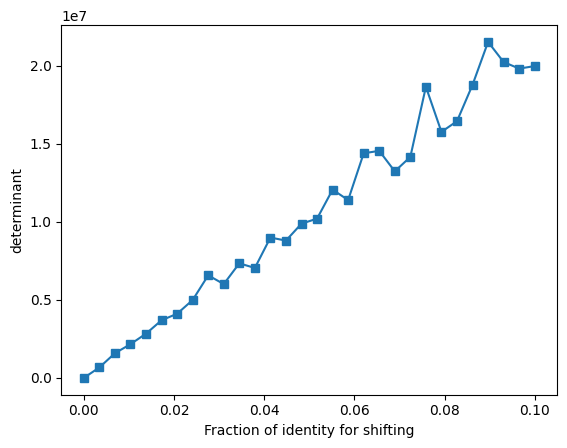

array([0.        , 0.00344828, 0.00689655, 0.01034483, 0.0137931 ,
       0.01724138, 0.02068966, 0.02413793, 0.02758621, 0.03103448,
       0.03448276, 0.03793103, 0.04137931, 0.04482759, 0.04827586,
       0.05172414, 0.05517241, 0.05862069, 0.06206897, 0.06551724,
       0.06896552, 0.07241379, 0.07586207, 0.07931034, 0.08275862,
       0.0862069 , 0.08965517, 0.09310345, 0.09655172, 0.1       ])

In [9]:
# Code Challenge: determinant of shifted matrices

# generate a 20x20 random matrix
# impose a linear dependence
# "shift" the matrix (0 -> 0.1 times the identity matrix) (lambda)
# compute abs (determinant)
# repeat 1000 times, take average abs det
# plot det by lambda

import matplotlib.pyplot as plt

lambdas = np.linspace(0,0.1,30)

# initialize
tmp = np.zeros(1000)
dets = np.zeros(len(lambdas))

for deti in range(len(lambdas)):
    # run 1000 iterations
    for i in range(1000):
        # generate a matrix
        M = np.random.randn(20, 20)
        M[:,0] = M[:,1]  # impose a linear dependence

        # compute the determinant
        tmp[i] = abs(np.linalg.det(M+lambdas[deti]*np.eye(20)))
    # compute average determinant
    dets[deti] = np.mean(tmp)

plt.plot(lambdas,dets,'s-')
plt.xlabel('Fraction of identity for shifting')
plt.ylabel('determinant')
plt.show()

lambdas

In [14]:
# Code Challenge: determinant matrix produce

# illustrate that det(AB) = det(A) * det(B)
# 1) for a random 3x3 matrix
# 2) in a loop over random matrix sizes up to 40x40

A = np.random.randn(3, 3)
B = np.random.randn(3, 3)
AB = A@B

print(np.linalg.det(A), np.linalg.det(B),
      np.linalg.det(A)*np.linalg.det(B), np.linalg.det(AB))


1.6110602253341604 1.2411641330214267 1.9995901678221775 1.999590167822177


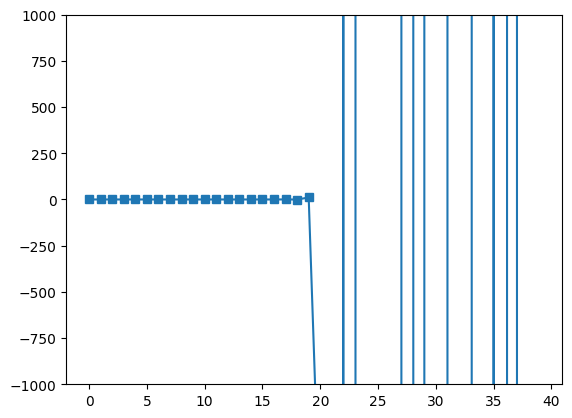

In [27]:
dets = np.zeros((40, 2))

for k in range(40):
    A = np.random.randn(k, k)
    B = np.random.randn(k, k)
    AB = A@B

    dets[k, 0] = np.linalg.det(A) * np.linalg.det(B)
    dets[k, 1] = np.linalg.det(AB)

plt.plot(dets[:,0]-dets[:,1], 's-')  # expect all zeros
plt.ylim([-1000, 1000])
plt.show()